<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/00_BraketSDK_LocalSimulator_mkbahk_20240927.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon: 회사이름
##amazon.com: 전자상거래 사이트
##AWS(Amazon Web Service): Amazon이 만들 Public Cloud 이름
##Amazon Braket: AWS내에 Quantum Service 이름
##Braket SDK: Qiskit, PennyLane, Q#, Cirq와 같은 수준의 Pyhton기반 Quantum 회로를 작성할 수 있는 Library집합, Quantum SDK 또는 QDK, AI로 말하는 Tensorflow, Pytorch와 같은 Framework

In [ ]:
!pip install -U pip

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
amazon-braket-default-simulator    1.26.0
amazon-braket-schemas              1.22.1
amazon-braket-sdk                  1.88.1
annotated-types                    0.7.0
antlr4-python3-runtime             4.9.2
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse     

In [ ]:
!pip install "numpy>=1.24,<1.26" matplotlib==3.9.2 scipy==1.14.1 amazon-braket-sdk==1.88.1

In [ ]:
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.88.1
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/amazon-braket/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: amazon-braket-default-simulator, amazon-braket-schemas, backoff, backports.entry-points-selectable, boltons, boto3, cloudpickle, nest-asyncio, networkx, numpy, openpulse, openqasm3, oqpy, sympy
Required-by: 


# Getting started with Amazon Braket

In this hello-world tutorial we prepare a maximally entangled Bell state between two qubits. We then run our circuit on a local simulator and obtain the results.

In [ ]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator

## Build a circuit

Let's build a Bell state with two qubits. By calling `Circuit()` we create an empty circuit, and we can just add gates to the circuit.

In [ ]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)
print(bell)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


In [ ]:
print(bell.diagram())

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [ ]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(bell, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 514, '00': 486})


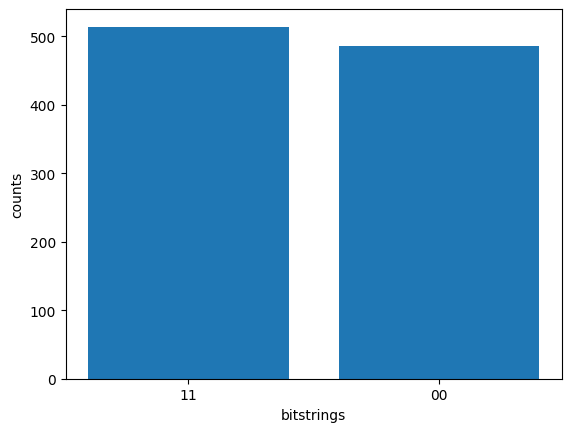

In [ ]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');